In [1]:
import yfinance as yf
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_price = pd.DataFrame()  # Create an empty DataFrame to store all data
symbols = ['ITUB3.SA','BBDC4.SA' , 'ROXO34.SA', 'BBAS3.SA', 'SANB11.SA', 'INBR32.SA', 'BPAC11.SA']
for symbol in symbols:
    stock = yf.Ticker(symbol)
    data = stock.history(period="max")
    data = data[['Close']]
    data.columns = [f'{symbol}_R$',]  # Add prefix to columns to differentiate symbols
    data_price = pd.concat([data_price, data], axis=1)  # Concatenate data for each symbol
data_price.reset_index(drop=False, inplace=True)
df = data_price 

In [21]:
#To drop rows with non-null values.
df_clean = data_price.dropna()
df_clean = df_clean.rename(columns={'ITUB3.SA_R$'  : 'ITUB3',
                                    'BBDC4.SA_R$'  : 'BBDC4', 
                                    'ROXO34.SA_R$' : 'ROXO34', 
                                    'BBAS3.SA_R$'  : 'BBAS3', 
                                    'SANB11.SA_R$' : 'SANB11', 
                                    'INBR32.SA_R$' : 'INBR32' ,
                                    'BPAC11.SA_R$' : 'BPAC11'  })

df_clean.head()

,Date,ITUB3,BBDC4,ROXO34,BBAS3,SANB11,INBR32,BPAC11
5927,2023-08-07 00:00:00-03:00,22.645260,14.771335,6.34,45.442211,27.055471,16.76,32.659069
5928,2023-08-08 00:00:00-03:00,22.431015,14.838740,6.46,45.125313,26.715334,16.48,32.649174
5929,2023-08-09 00:00:00-03:00,22.235394,14.761704,6.38,44.875629,26.375196,16.18,32.570026
5930,2023-08-10 00:00:00-03:00,22.226078,14.886885,6.25,45.106106,26.297451,16.92,32.500771
5931,2023-08-11 00:00:00-03:00,22.104979,14.800221,6.28,45.595863,26.433508,18.00,31.936829


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 5927 to 6086
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype                            
---  ------  --------------  -----                            
 0   Date    160 non-null    datetime64[ns, America/Sao_Paulo]
 1   ITUB3   160 non-null    float64                          
 2   BBDC4   160 non-null    float64                          
 3   ROXO34  160 non-null    float64                          
 4   BBAS3   160 non-null    float64                          
 5   SANB11  160 non-null    float64                          
 6   INBR32  160 non-null    float64                          
 7   BPAC11  160 non-null    float64                          
dtypes: datetime64[ns, America/Sao_Paulo](1), float64(7)
memory usage: 11.2 KB


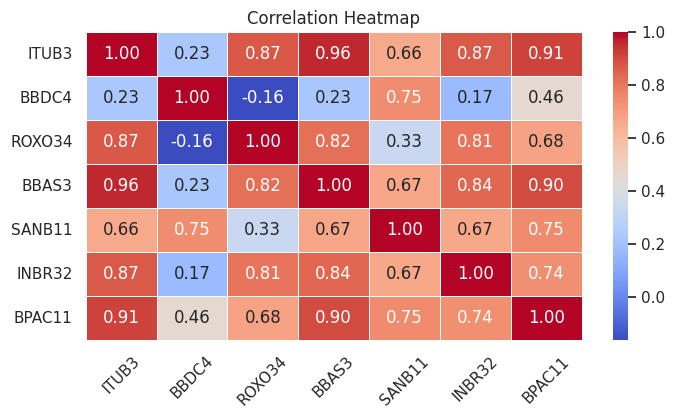

In [30]:
# Your DataFrame
df = data_to_corr = df_clean[['ITUB3', 'BBDC4', 
                              'ROXO34', 'BBAS3', 
                              'SANB11', 'INBR32', 
                              'BPAC11']]
correlation_matrix = df.corr() # Calculate the correlation matrix

# Plot the heatmap only with values below the main diagonal
plt.figure(figsize=(8, 4))  # Figure size
sns.set_theme(style="white")  # Setting a white style without grid
# Plot the heatmap with values below the main diagonal
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True, cmap='coolwarm',
                        fmt=".2f", linewidths=.5)  
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
heatmap.set_facecolor('none')  # Remove the background color of the heatmap
plt.title('Correlation Heatmap')  # Title of the plot
plt.show()


In [35]:
# Series to be analised
x = df_clean['ITUB3']
y = df_clean['BBAS3']

# Calculate the Pearson correlation coefficient and the associated p-value
correlation_coefficient, p_value = pearsonr(x, y)

# Print the result
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Test for statistical significance with a confidence level of 0.01 (1%)
if p_value < 0.01:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")



Pearson Correlation Coefficient: 0.9600351663677384
P-value: 2.7594006852839285e-89
The correlation is statistically significant.


In [34]:
# Series to be analised
x = df_clean['ROXO34']
y = df_clean['BBAS3']

# Calculate the Pearson correlation coefficient and the associated p-value
correlation_coefficient, p_value = pearsonr(x, y)

# Print the result
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Test for statistical significance with a confidence level of 0.05 (1%)
if p_value < 0.01:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient: 0.8175606896328338
P-value: 1.0376431058858618e-39
The correlation is statistically significant.


In [36]:
# Series to be analised
x = df_clean['INBR32']
y = df_clean['BBDC4']

# Calculate the Pearson correlation coefficient and the associated p-value
correlation_coefficient, p_value = pearsonr(x, y)

# Print the result
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Test for statistical significance with a confidence level of 0.05 (5%)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient: 0.1696272382395749
P-value: 0.03200283117956006
The correlation is statistically significant.
